In [1]:
import run_benchmark

In [2]:
# For benchmark tables
run_benchmark.main()

Found 7 models to benchmark:
  - Qwen3-30B-A3B
  - Qwen3-4B
  - Qwen2.5-32B
  - Qwen2.5-72B
  - Llama-3.3-70B
  - Gemma-3-4B
  - Gemma-3-27B

Starting comprehensive model benchmark...

[1/7] Evaluating Qwen3-30B-A3B...
  ✓ Macro F1: 0.7648

[2/7] Evaluating Qwen3-4B...
  ✓ Macro F1: 0.6546

[3/7] Evaluating Qwen2.5-32B...
  ✓ Macro F1: 0.6726

[4/7] Evaluating Qwen2.5-72B...
  ✓ Macro F1: 0.6227

[5/7] Evaluating Llama-3.3-70B...
  ✓ Macro F1: 0.6064

[6/7] Evaluating Gemma-3-4B...
  ✓ Macro F1: 0.3172

[7/7] Evaluating Gemma-3-27B...
  ✓ Macro F1: 0.6292
✓ Benchmark completed!
Contract Number
Date
Email Address
Location
Organization Name
Person Name
Phone Number
Contract Number
Date
Email Address
Location
Organization Name
Person Name
Phone Number
Contract Number
Date
Email Address
Location
Organization Name
Person Name
Phone Number
Contract Number
Date
Email Address
Location
Organization Name
Person Name
Phone Number
Contract Number
Date
Email Address
Location
Organization Name
Perso

In [3]:
# Here we plot the results of the benchmark
benchmark_results = run_benchmark.benchmark_all_models(run_benchmark.models, run_benchmark.ground_truth_dir)


[1/7] Evaluating Qwen3-30B-A3B...
  ✓ Macro F1: 0.7648

[2/7] Evaluating Qwen3-4B...
  ✓ Macro F1: 0.6546

[3/7] Evaluating Qwen2.5-32B...
  ✓ Macro F1: 0.6726

[4/7] Evaluating Qwen2.5-72B...
  ✓ Macro F1: 0.6227

[5/7] Evaluating Llama-3.3-70B...
  ✓ Macro F1: 0.6064

[6/7] Evaluating Gemma-3-4B...
  ✓ Macro F1: 0.3172

[7/7] Evaluating Gemma-3-27B...
  ✓ Macro F1: 0.6292


In [4]:
print(benchmark_results)

{'Qwen3-30B-A3B': {'overall': {'precision': 0.7512100039787077, 'recall': 0.8030293766126949, 'f1': 0.7647817929461712, 'tp': 1322, 'fp': 365, 'fn': 310, 'bbox_fails': 0, 'processed_files': 108, 'error_files': 0}, 'per_entity_type': {'Contract Number': {'precision': 0.45454545454545453, 'recall': 0.8024691358024691, 'f1': 0.5803571428571428, 'tp': 65, 'fp': 78, 'fn': 16, 'bbox_fails': 0, 'ground_truth_count': 81, 'predicted_count': 143, 'unmatched_gt_info': [{'gt_value': 'ext. 4043', 'best_match_value': 'AC5001029858', 'text_similarity': 0.39814814814814814, 'bbox_iou': 0.0, 'document_id': 'fhnm0001_page1.json'}, {'gt_value': '70071 5263', 'best_match_value': 'RJR0000000046027194', 'text_similarity': 0.4535087719298246, 'bbox_iou': 0.0, 'document_id': 'fgmp0189_page3.json'}, {'gt_value': '70013 3630', 'best_match_value': 'RJR0000001371017574', 'text_similarity': 0.5210526315789473, 'bbox_iou': 0.0, 'document_id': 'fjcx0221_page2.json'}, {'gt_value': '740,007', 'best_match_value': '1110

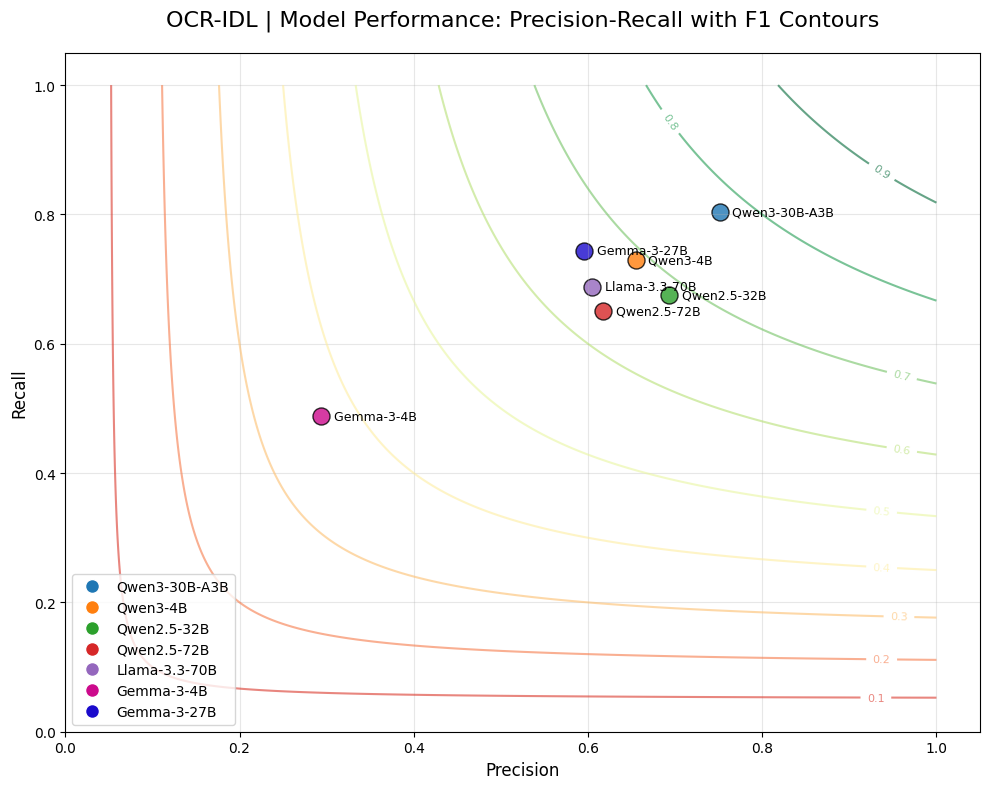

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# After running your benchmark and getting the results
# benchmark_results = run_benchmark.benchmark_all_models(run_benchmark.models, run_benchmark.ground_truth_dir)

def create_precision_recall_plot(benchmark_results):
    """
    Create a precision-recall plot with F1 contours for all models.
    
    Args:
        benchmark_results: Dictionary containing results from benchmark_all_models
    """
    
    # Extract overall metrics for each model
    model_data = {}
    for model_name, results in benchmark_results.items():
        if results is not None:
            model_data[model_name] = {
                'precision': results['overall']['precision'],
                'recall': results['overall']['recall'],
                'f1': results['overall']['f1']
            }
    
    # Precision-Recall grid for F1 contours
    x = np.linspace(0.01, 1, 300)
    y = np.linspace(0.01, 1, 300)
    X, Y = np.meshgrid(x, y)
    F1_grid = 2 * X * Y / (X + Y)
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 8))
    contours = ax.contour(X, Y, F1_grid, levels=np.arange(0.0, 1.0, 0.1), cmap='RdYlGn', alpha=0.6)
    ax.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')
    
    # Color palette for models
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#cc0a8c', '#1a0acc']
    
    # Scatter points with labels
    for i, (model_name, data) in enumerate(model_data.items()):
        color = colors[i % len(colors)]
        ax.scatter(data['precision'], data['recall'], s=150, color=color, alpha=0.8, 
                  edgecolors='black', linewidth=1)
        ax.text(data['precision'] + 0.01, data['recall'], 
                f" {model_name}", 
                fontsize=9, va='center', ha='left', 
                )
    
    # Labels and styling
    ax.set_title("OCR-IDL | Model Performance: Precision-Recall with F1 Contours", fontsize=16, pad=20)
    ax.set_xlabel("Precision", fontsize=12)
    ax.set_ylabel("Recall", fontsize=12)
    ax.set_xlim(0, 1.05)
    ax.set_ylim(0, 1.05)
    ax.grid(True, alpha=0.3)
    
    # Add legend
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', 
                                  markerfacecolor=colors[i % len(colors)], 
                                  markersize=10, label=model_name) 
                      for i, model_name in enumerate(model_data.keys())]
    ax.legend(handles=legend_elements, loc='lower left', bbox_to_anchor=(0, 0))
    
    plt.tight_layout()
    plt.savefig("/Volumes/MyDataDrive/thesis/code-2/src/statistics/plots/benchmark_precision_recall_ocr_idl.png", dpi=600, bbox_inches='tight')
    plt.show()

create_precision_recall_plot(benchmark_results)

In [7]:
# Fix: Rerun with best_match_info included
def compute_annotator_metrics_with_best_match_info(benchmark_results):
    """
    Compute annotator-wise metrics using the existing processed benchmark_results.
    Includes the 'best_match_info' column for proper TP/FP/FN classification.
    """
    
    all_annotator_data = []
    
    # Process each model's results
    for model_name, model_data in benchmark_results.items():
        if model_data is None or 'results_df' not in model_data:
            continue
            
        df = model_data['results_df']
        print(f"\nProcessing {model_name}...")
        print(f"DataFrame shape: {df.shape}")
        
        # Check for required columns
        if 'annotators' not in df.columns:
            print(f"Warning: No 'annotators' column found in {model_name}")
            continue
        
        # Process each row (entity) in the results
        for idx, row in df.iterrows():
            annotators = row.get('annotators', [])
            
            # Convert string representation to list if necessary
            if isinstance(annotators, str):
                if annotators.startswith('[') and annotators.endswith(']'):
                    try:
                        annotators = eval(annotators)
                    except:
                        annotators = [annotators.strip('[]')]
                else:
                    annotators = [annotators]
            elif not isinstance(annotators, list):
                annotators = [str(annotators)]
            
            # Separate ground_truth entries from annotator entries
            has_ground_truth = 'ground_truth' in annotators
            filtered_annotators = [ann for ann in annotators if ann != 'ground_truth']
            
            # Get prediction correctness and entity info
            is_correct = row.get('is_correct', False)
            entity_type = row.get('entity_type', row.get('type', 'unknown'))
            document_id = row.get('document_id', '')
            prediction_text = row.get('prediction_text', '')
            ground_truth_text = row.get('ground_truth_text', '')
            
            # Create entries for each annotator
            for annotator in filtered_annotators:
                all_annotator_data.append({
                    'model': model_name,
                    'annotator': annotator,
                    'entity_type': entity_type,
                    'is_correct': is_correct,
                    'document_id': document_id,
                    'prediction_text': prediction_text,
                    'ground_truth_text': ground_truth_text,
                    'match_type': row.get('match_type', ''),
                    'best_match_info': row.get('best_match_info', ''),  # <- Added this!
                    'text_similarity': row.get('text_similarity', 0.0),
                    'has_ground_truth': has_ground_truth
                })
    
    if not all_annotator_data:
        print("No annotator data found!")
        return None
    
    # Convert to DataFrame
    annotator_df = pd.DataFrame(all_annotator_data)
    
    print(f"\nTotal annotator entries: {len(annotator_df)}")
    print(f"Unique annotators: {annotator_df['annotator'].nunique()}")
    print(f"Annotators: {list(annotator_df['annotator'].unique())}")
    
    return annotator_df

# Run the corrected data extraction
annotator_df_fixed = compute_annotator_metrics_with_best_match_info(benchmark_results)

if annotator_df_fixed is not None:
    print(f"\nColumns in fixed dataframe: {list(annotator_df_fixed.columns)}")
    if 'best_match_info' in annotator_df_fixed.columns:
        print(f"Unique values in best_match_info: {annotator_df_fixed['best_match_info'].unique()}")
    else:
        print("Still no best_match_info column found")



Processing Qwen3-30B-A3B...
DataFrame shape: (1997, 13)

Processing Qwen3-4B...
DataFrame shape: (2335, 13)

Processing Qwen2.5-32B...
DataFrame shape: (1924, 13)

Processing Qwen2.5-72B...
DataFrame shape: (1374, 13)

Processing Llama-3.3-70B...
DataFrame shape: (888, 13)

Processing Gemma-3-4B...
DataFrame shape: (1523, 13)

Processing Gemma-3-27B...
DataFrame shape: (1875, 13)

Total annotator entries: 22449
Unique annotators: 3
Annotators: [np.int64(0), np.int64(1), np.int64(2)]

Columns in fixed dataframe: ['model', 'annotator', 'entity_type', 'is_correct', 'document_id', 'prediction_text', 'ground_truth_text', 'match_type', 'best_match_info', 'text_similarity', 'has_ground_truth']
Unique values in best_match_info: ['match' 'false_positive']


In [9]:
# Corrected analysis using the 'best_match_info' column
def analyze_annotator_performance_with_best_match_info(annotator_df):
    """
    Analyze annotator performance using the 'best_match_info' column.
    
    Logic based on best_match_info values:
    - 'match' = True Positive (correct prediction)
    - 'false_positive' = False Positive (incorrect prediction) 
    - 'false_negative' = False Negative (missed ground truth)
    - Any other value = treated as False Positive
    """
    if annotator_df is None or len(annotator_df) == 0:
        print("No data to analyze!")
        return None
    
    # Check if best_match_info column exists
    if 'best_match_info' not in annotator_df.columns:
        print("Warning: 'best_match_info' column not found!")
        print(f"Available columns: {list(annotator_df.columns)}")
        return None
    
    print("Unique values in best_match_info:", annotator_df['best_match_info'].unique())
    
    results = {}
    
    # 1. Overall annotator performance
    overall_performance = []
    
    for annotator in annotator_df['annotator'].unique():
        ann_data = annotator_df[annotator_df['annotator'] == annotator]
        
        # Count based on best_match_info values
        tp = len(ann_data[ann_data['best_match_info'] == 'match'])
        fp = len(ann_data[ann_data['best_match_info'] == 'false_positive'])
        fn = len(ann_data[ann_data['best_match_info'] == 'false_negative'])
        
        # Any other values should be treated as false positives
        other_values = ann_data[~ann_data['best_match_info'].isin(['match', 'false_positive', 'false_negative'])]
        fp += len(other_values)
        
        if len(other_values) > 0:
            print(f"Note: Found {len(other_values)} entries with other best_match_info values for annotator {annotator}")
            print(f"Other values: {other_values['best_match_info'].unique()}")
        
        # Calculate metrics
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        overall_performance.append({
            'Annotator': annotator,
            'Precision': precision,
            'Recall': recall,
            'F1_Score': f1,
            'True_Positives': tp,
            'False_Positives': fp,
            'False_Negatives': fn,
            'Total_Predictions': len(ann_data),
            'Unique_Documents': ann_data['document_id'].nunique(),
            'Unique_Entity_Types': ann_data['entity_type'].nunique()
        })
    
    overall_df = pd.DataFrame(overall_performance).sort_values('F1_Score', ascending=False)
    
    # 2. Per-entity-type performance
    entity_performance = []
    
    for annotator in annotator_df['annotator'].unique():
        ann_data = annotator_df[annotator_df['annotator'] == annotator]
        
        for entity_type in ann_data['entity_type'].unique():
            entity_data = ann_data[ann_data['entity_type'] == entity_type]
            
            # Count based on best_match_info for this entity type
            tp = len(entity_data[entity_data['best_match_info'] == 'match'])
            fp = len(entity_data[entity_data['best_match_info'] == 'false_positive'])
            fn = len(entity_data[entity_data['best_match_info'] == 'false_negative'])
            
            # Add other values as false positives
            other_values = entity_data[~entity_data['best_match_info'].isin(['match', 'false_positive', 'false_negative'])]
            fp += len(other_values)
            
            # Calculate metrics
            precision = tp / (tp + fp) if (tp + fp) > 0 else 0
            recall = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            
            entity_performance.append({
                'Annotator': annotator,
                'Entity_Type': entity_type,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'True_Positives': tp,
                'False_Positives': fp,
                'False_Negatives': fn,
                'Total_Predictions': len(entity_data)
            })
    
    entity_df = pd.DataFrame(entity_performance)
    
    # Create pivot tables
    f1_pivot = entity_df.pivot(index='Entity_Type', columns='Annotator', values='F1_Score')
    precision_pivot = entity_df.pivot(index='Entity_Type', columns='Annotator', values='Precision')
    recall_pivot = entity_df.pivot(index='Entity_Type', columns='Annotator', values='Recall')
    
    results = {
        'overall_performance': overall_df,
        'entity_performance': entity_df,
        'f1_pivot': f1_pivot,
        'precision_pivot': precision_pivot,
        'recall_pivot': recall_pivot,
        'raw_data': annotator_df
    }
    
    return results

# Run the corrected analysis using best_match_info
if annotator_df_fixed is not None:
    print("Running analysis with best_match_info column...")
    annotator_analysis_corrected = analyze_annotator_performance_with_best_match_info(annotator_df_fixed)
else:
    annotator_analysis_corrected = None


Running analysis with best_match_info column...
Unique values in best_match_info: ['match' 'false_positive']


In [10]:
# Display results using the corrected analysis
if annotator_analysis_corrected:
    final_corrected_results = display_annotator_analysis(annotator_analysis_corrected)
    
    # Show distribution of match_type values
    print("\n" + "=" * 80)
    print("MATCH_TYPE VALUE DISTRIBUTION")
    print("=" * 80)
    
    print("\nOverall distribution:")
    print(annotator_df_fixed['best_match_info'].value_counts())
    
    print("\nDistribution by annotator:")
    for annotator in annotator_df_fixed['annotator'].unique():
        ann_data = annotator_df_fixed[annotator_df_fixed['annotator'] == annotator]
        print(f"\nAnnotator {annotator}:")
        print(ann_data['best_match_info'].value_counts())
    
    # Show sample of raw data with best_match_info
    print("\n" + "=" * 80)
    print("SAMPLE DATA WITH BEST_MATCH_INFO")
    print("=" * 80)
    sample_cols = ['annotator', 'entity_type', 'best_match_info', 'document_id', 'prediction_text', 'ground_truth_text']
    available_cols = [col for col in sample_cols if col in annotator_df_fixed.columns]
    print(annotator_df_fixed[available_cols].head(15))
    
else:
    print("No corrected analysis results to display.")


NameError: name 'display_annotator_analysis' is not defined

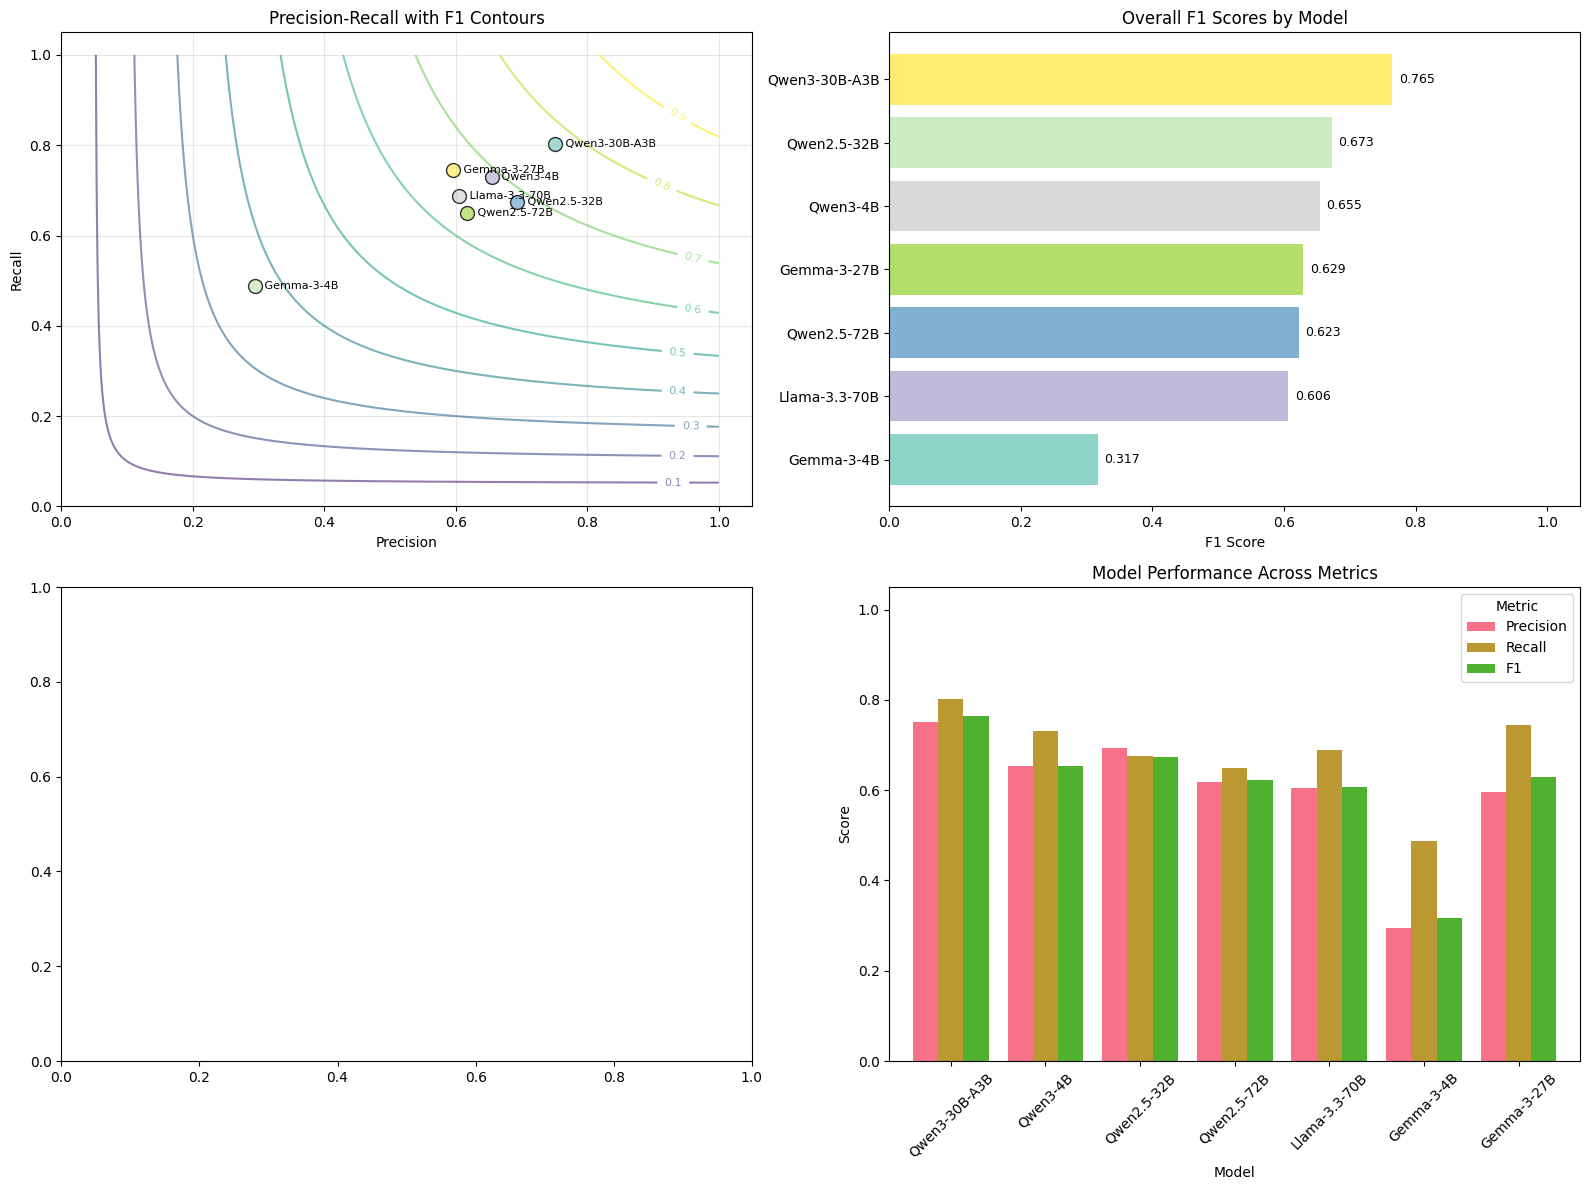

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def create_comprehensive_plots(benchmark_results):
    """
    Create comprehensive plots for benchmark results.
    
    Args:
        benchmark_results: Dictionary containing results from benchmark_all_models
    """
    
    # Extract data for plotting
    model_data = []
    for model_name, results in benchmark_results.items():
        if results is not None:
            model_data.append({
                'Model': model_name,
                'Precision': results['overall']['precision'],
                'Recall': results['overall']['recall'],
                'F1': results['overall']['f1']
            })
    
    overall_df = pd.DataFrame(model_data)
    
    # Create pivot tables for entity-specific analysis
    entity_data = []
    for model_name, results in benchmark_results.items():
        if results is not None:
            for entity_type, metrics in results['per_entity_type'].items():
                entity_data.append({
                    'Model': model_name,
                    'Entity Type': entity_type,
                    'Precision': metrics['precision'],
                    'Recall': metrics['recall'],
                    'F1': metrics['f1']
                })
    
    entity_df = pd.DataFrame(entity_data)
    f1_pivot = entity_df.pivot(index='Entity Type', columns='Model', values='F1')
    
    # Set style
    plt.style.use('default')
    sns.set_palette("husl")
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    # fig.suptitle('Comprehensive Model Benchmark Results', fontsize=16, y=0.95)
    
    # 1. Precision-Recall Plot with F1 contours
    ax1 = axes[0, 0]
    x = np.linspace(0.01, 1, 300)
    y = np.linspace(0.01, 1, 300)
    X, Y = np.meshgrid(x, y)
    F1_grid = 2 * X * Y / (X + Y)
    
    contours = ax1.contour(X, Y, F1_grid, levels=np.arange(0.0, 1.0, 0.1), cmap='viridis', alpha=0.6)
    ax1.clabel(contours, inline=True, fontsize=8, fmt='%1.1f')
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(overall_df)))
    for i, (_, row) in enumerate(overall_df.iterrows()):
        ax1.scatter(row['Precision'], row['Recall'], 
                   s=100, color=colors[i], alpha=0.8, edgecolors='black', linewidth=1)
        ax1.text(row['Precision'] + 0.01, row['Recall'], 
                f" {row['Model']}", fontsize=8, va='center')
    
    ax1.set_title("Precision-Recall with F1 Contours")
    ax1.set_xlabel("Precision")
    ax1.set_ylabel("Recall")
    ax1.set_xlim(0, 1.05)
    ax1.set_ylim(0, 1.05)
    ax1.grid(True, alpha=0.3)
    
    # 2. Overall F1 Score Bar Plot
    ax2 = axes[0, 1]
    overall_sorted = overall_df.sort_values('F1', ascending=True)
    bars = ax2.barh(overall_sorted['Model'], overall_sorted['F1'], 
                   color=colors[:len(overall_sorted)])
    
    # Add value labels on bars
    for i, (bar, f1) in enumerate(zip(bars, overall_sorted['F1'])):
        ax2.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                f'{f1:.3f}', va='center', fontsize=9)
    
    ax2.set_title("Overall F1 Scores by Model")
    ax2.set_xlabel("F1 Score")
    ax2.set_xlim(0, 1.05)
    
    # # 3. Heatmap of F1 scores by entity type
    # ax3 = axes[1, 0]
    # sns.heatmap(f1_pivot, annot=True, fmt='.3f', cmap='RdYlGn', 
    #             cbar_kws={'label': 'F1 Score'}, linewidths=0.5, ax=ax3)
    # ax3.set_title("F1 Scores by Entity Type and Model")
    # ax3.set_xlabel("Model")
    # ax3.set_ylabel("Entity Type")
    
    # 4. Model comparison across metrics
    ax4 = axes[1, 1]
    metrics_comparison = overall_df[['Model', 'Precision', 'Recall', 'F1']].set_index('Model')
    metrics_comparison.plot(kind='bar', ax=ax4, width=0.8)
    ax4.set_title("Model Performance Across Metrics")
    ax4.set_ylabel("Score")
    ax4.set_xlabel("Model")
    ax4.legend(title="Metric")
    ax4.tick_params(axis='x', rotation=45)
    ax4.set_ylim(0, 1.05)
    
    plt.tight_layout()
    plt.show()
    
# Usage:
create_comprehensive_plots(benchmark_results)